# CoronaData

### Analyze open data of RIVM 
Johan van Voskuilen, 16-08-2020 (first)

Todo: add temperature data to look for trends; use https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/daggegevens/etmgeg_260.zip which gives homogenised temperature data (a.o.) from De Bilt.

##### Import Python modules

In [1]:
%matplotlib inline

import os
from io import BytesIO
from zipfile import ZipFile
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request

##### Import data

###### Import RIVM data on COVID-19 patients

In [2]:
dataurl = 'https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_cumulatief.csv'
with urllib.request.urlopen(dataurl) as response:
    df = pd.read_csv(response, sep=';', parse_dates=[0], index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73033 entries, 2020-03-13 10:00:00 to 2020-09-27 10:00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Municipality_code   70645 non-null  object
 1   Municipality_name   70645 non-null  object
 2   Province            73033 non-null  object
 3   Total_reported      73033 non-null  int64 
 4   Hospital_admission  73033 non-null  int64 
 5   Deceased            73033 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [3]:
df.describe()

,Total_reported,Hospital_admission,Deceased
count,73033.000000,73033.000000,73033.000000
mean,131.891638,28.450646,13.770925
std,339.930896,51.718826,28.316887
min,0.000000,0.000000,0.000000
25%,31.000000,7.000000,2.000000
50%,68.000000,16.000000,7.000000
75%,138.000000,32.000000,15.000000
max,12018.000000,748.000000,361.000000


###### Import KNMI temperature and humidity data from De Bilt

In [4]:
np.arange(50, 43550)

array([   50,    51,    52, ..., 43547, 43548, 43549])

In [5]:
dataurl = r'https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/daggegevens/etmgeg_260.zip'
with urllib.request.urlopen(dataurl) as response:
    zipfile = ZipFile(BytesIO(response.read()))
    with zipfile.open(zipfile.namelist()[0], 'r') as g:     
        dfKNMI = pd.read_csv(g, header=44, sep=',', index_col=0, parse_dates=True, skipinitialspace=True, skiprows=np.arange(49, 43585), usecols=['YYYYMMDD', 'TG', 'TN', 'TX', 'SQ', 'SP', 'PG', 'NG', 'UG', 'UN', 'UX'])
dfKNMI['TG'] = dfKNMI['TG']/10
dfKNMI['TN'] = dfKNMI['TN']/10
dfKNMI['TX'] = dfKNMI['TX']/10
dfKNMI['SQ'] = dfKNMI['SQ']/10
dfKNMI['PG'] = dfKNMI['PG']/10
dfKNMI = dfKNMI.rename(columns={ 'TG':'temperatuur gem. 24h [°C]', 'TN':'minimum temperatuur [°C]', 'TX':'maximum temperatuur [°C]', 'SQ':'zonneschijnduur [h]', 'SP':'percentage van potentiële zonneschijnduur', 'PG':'luchtdruk gem. 24h [hPa]', 'NG':'bewolkingsgraad gem. 24h', 'UG':'relatieve vochtigheid gem. 24h [%]', 'UN':'minimum vochtigheid [%]', 'UX':'maximum vochtigheid [%]'})
dfKNMI

,temperatuur gem. 24h [°C],minimum temperatuur [°C],maximum temperatuur [°C],zonneschijnduur [h],percentage van potentiële zonneschijnduur,luchtdruk gem. 24h [hPa],bewolkingsgraad gem. 24h,relatieve vochtigheid gem. 24h [%],maximum vochtigheid [%],minimum vochtigheid [%]
YYYYMMDD,,,,,,,,,,
2020-03-13,6.6,1.7,9.0,2.2,19,1016.1,7,81,98,67
2020-03-14,6.7,0.4,11.8,5.6,48,1018.5,7,80,99,55
2020-03-15,9.6,7.7,11.2,0.7,6,1012.3,8,78,89,68
2020-03-16,7.5,2.2,13.0,6.7,57,1020.2,4,82,98,55
2020-03-17,8.6,1.2,13.3,8.1,68,1028.1,8,68,98,47
...,...,...,...,...,...,...,...,...,...,...
2020-09-22,14.1,5.2,23.6,11.2,91,1009.6,1,76,99,35
2020-09-23,16.2,9.5,21.8,2.9,24,1002.2,7,84,98,58
2020-09-24,13.7,11.5,17.5,6.2,51,999.1,5,79,92,55


##### Analyze data

###### Analyze cumulative per day

In [6]:
df['2020-03-13'].sum()

Province              GroningenGroningenGroningenGroningenFlevolandG...
Total_reported                                                      804
Hospital_admission                                                  115
Deceased                                                              9
dtype: object

In [7]:
CumulativePerDay = df.groupby(df.index.date).sum()

In [8]:
CumulativePerDay.index

Index([2020-03-13, 2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18,
       2020-03-19, 2020-03-20, 2020-03-21, 2020-03-22,
       ...
       2020-09-18, 2020-09-19, 2020-09-20, 2020-09-21, 2020-09-22, 2020-09-23,
       2020-09-24, 2020-09-25, 2020-09-26, 2020-09-27],
      dtype='object', length=199)

###### Calculate differential per day

In [9]:
CumulativePerDay

,Total_reported,Hospital_admission,Deceased
2020-03-13,804,115,9
2020-03-14,959,136,12
2020-03-15,1135,162,19
2020-03-16,1413,205,23
2020-03-17,1705,314,40
...,...,...,...
2020-09-23,100597,12499,6296
2020-09-24,103141,12524,6312
2020-09-25,105918,12560,6328
2020-09-26,108631,12589,6366


In [10]:
DifferencePerDay = CumulativePerDay.diff().fillna(CumulativePerDay).astype(int)
DifferencePerDay.tail(25)

,Total_reported,Hospital_admission,Deceased
2020-09-03,601,5,0
2020-09-04,744,7,2
2020-09-05,654,5,4
2020-09-06,925,5,2
2020-09-07,797,9,0
2020-09-08,964,6,1
2020-09-09,1140,8,2
2020-09-10,823,17,3
2020-09-11,1270,10,3
2020-09-12,1231,6,1


###### Add rolling mean for total reported

In [11]:
DifferencePerDay['Total_reported_rollingmean3days'] = DifferencePerDay['Total_reported'].rolling(3, min_periods=1).mean()
DifferencePerDay['Hospital_admission_rollingmean3days'] = DifferencePerDay['Hospital_admission'].rolling(3, min_periods=1).mean()
DifferencePerDay['Deceased_rollingmean3days'] = DifferencePerDay['Deceased'].rolling(3, min_periods=1).mean()
DifferencePerDay.tail()

,Total_reported,Hospital_admission,Deceased,Total_reported_rollingmean3days,Hospital_admission_rollingmean3days,Deceased_rollingmean3days
2020-09-23,2357,32,5,2273.000000,30.000000,5.666667
2020-09-24,2544,25,16,2382.000000,29.666667,10.333333
2020-09-25,2777,36,16,2559.333333,31.000000,12.333333
2020-09-26,2713,29,38,2678.000000,30.000000,23.333333
2020-09-27,2995,37,8,2828.333333,34.000000,20.666667


###### Weekly rolling sum of new reported cases, hospital admissions and deceased

In [12]:
Weekly = pd.DataFrame(index=DifferencePerDay.index)
Weekly['New_reported_rollingsum1week'] = DifferencePerDay['Total_reported'].rolling(7, min_periods=1).sum()
Weekly['Hospital_admission_rollingsum1week'] = DifferencePerDay['Hospital_admission'].rolling(7, min_periods=1).sum()
Weekly['Deceased_rollingsum1week'] = DifferencePerDay['Deceased'].rolling(7, min_periods=1).sum()
Weekly.tail()

,New_reported_rollingsum1week,Hospital_admission_rollingsum1week,Deceased_rollingsum1week
2020-09-23,14277.0,169.0,36.0
2020-09-24,15068.0,180.0,46.0
2020-09-25,15871.0,204.0,55.0
2020-09-26,16697.0,200.0,91.0
2020-09-27,17848.0,217.0,95.0


##### Plot results

Plot of cumulative numbers

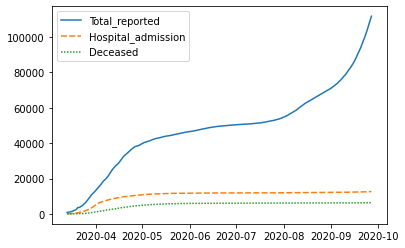

In [13]:
ax = sns.lineplot(data = CumulativePerDay)

Plot of last days (cumulative)

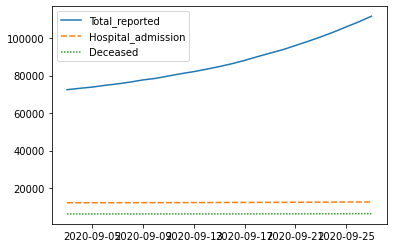

In [14]:
ax = sns.lineplot(data = CumulativePerDay[-25:])

Plot of difference per day

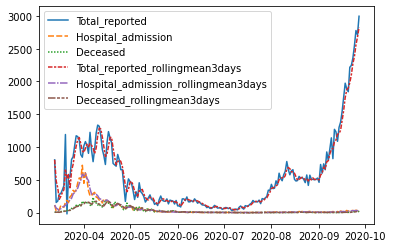

In [15]:
ax = sns.lineplot(data=DifferencePerDay)

Zoom in on hospital admissions and deceased:

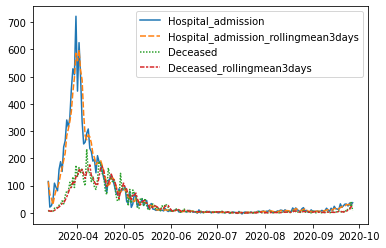

In [16]:
ax = sns.lineplot(data=DifferencePerDay.loc[:, ['Hospital_admission', 'Hospital_admission_rollingmean3days', 'Deceased', 'Deceased_rollingmean3days']])

Plot of last days (differential)

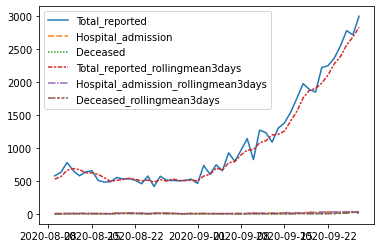

In [17]:
ax = sns.lineplot(data=DifferencePerDay[-50:])

Results of last days:

In [18]:
DifferencePerDay.tail(10)

,Total_reported,Hospital_admission,Deceased,Total_reported_rollingmean3days,Hospital_admission_rollingmean3days,Deceased_rollingmean3days
2020-09-18,1974,12,7,1756.333333,13.666667,5.000000
2020-09-19,1887,33,2,1871.333333,19.666667,5.000000
2020-09-20,1844,20,4,1901.666667,21.666667,4.333333
2020-09-21,2217,26,2,1982.666667,26.333333,2.666667
2020-09-22,2245,32,10,2102.000000,26.000000,5.333333
2020-09-23,2357,32,5,2273.000000,30.000000,5.666667
2020-09-24,2544,25,16,2382.000000,29.666667,10.333333
2020-09-25,2777,36,16,2559.333333,31.000000,12.333333
2020-09-26,2713,29,38,2678.000000,30.000000,23.333333
2020-09-27,2995,37,8,2828.333333,34.000000,20.666667


Weekly result of new reported cases:

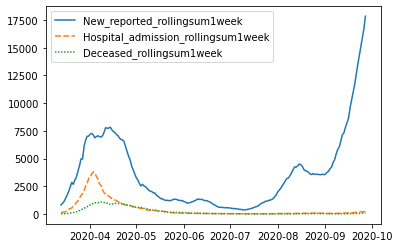

In [19]:
ax = sns.lineplot(data=Weekly)

Weekly number of hospital admissions:

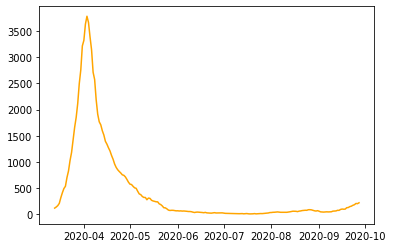

In [20]:
ax = sns.lineplot(data=Weekly['Hospital_admission_rollingsum1week'], color='orange')

Weekly number of deceased patients:

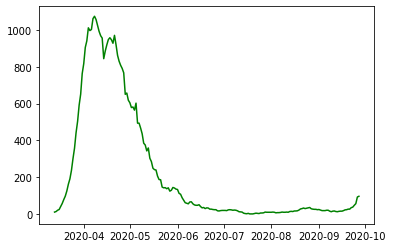

In [21]:
ax = sns.lineplot(data=Weekly['Deceased_rollingsum1week'], color='green')

###### Combine with KNMI weather data

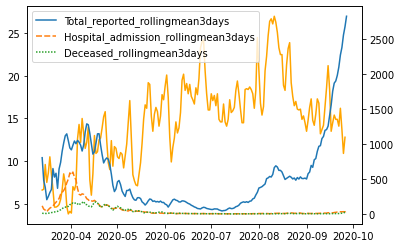

In [22]:
ax = sns.lineplot(data=dfKNMI['temperatuur gem. 24h [°C]'], color='orange')
ax2 = ax.twinx()                                  
ax2 = sns.lineplot(data=DifferencePerDay.loc[:, ['Total_reported_rollingmean3days', 'Hospital_admission_rollingmean3days', 'Deceased_rollingmean3days']], color='green')

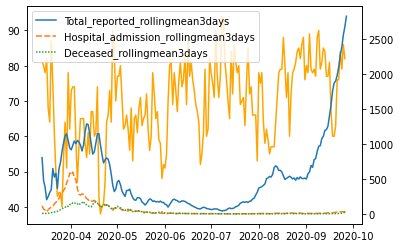

In [23]:
ax = sns.lineplot(data=dfKNMI['relatieve vochtigheid gem. 24h [%]'], color='orange')
ax2 = ax.twinx()                                  
ax2 = sns.lineplot(data=DifferencePerDay.loc[:, ['Total_reported_rollingmean3days', 'Hospital_admission_rollingmean3days', 'Deceased_rollingmean3days']], color='green')